<a href="https://colab.research.google.com/github/Thejuskuku/Sem-3/blob/main/MedicalImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy opencv-python pywavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

# Get the uploaded file's name
image_filename = next(iter(uploaded))


Saving ID_0088_AGE_0067_CONTRAST_0_CT.png to ID_0088_AGE_0067_CONTRAST_0_CT.png


In [3]:
!pip install PyWavelets
import numpy as np
import pywt
import cv2

def rgb_to_yuv(image):
    # Convert RGB to YUV
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

def yuv_to_rgb(image):
    # Convert YUV to RGB
    return cv2.cvtColor(image, cv2.COLOR_YUV2RGB)

def calculate_dwt(channel):
    # Perform Discrete Wavelet Transform on a channel
    coeffs = pywt.wavedec2(channel, 'haar', level=3)
    return coeffs

def thresholding(coeffs, T):
    # Apply thresholding to the wavelet coefficients
    thresholded_coeffs = []
    for level in coeffs:
        thresholded_level = tuple(np.where(np.abs(c) >= T, c, 0) for c in level)
        thresholded_coeffs.append(thresholded_level)
    return thresholded_coeffs

def compress_channel(channel, initial_threshold, bit_budget):
    # Compress a single channel using the CWDR algorithm
    coeffs = calculate_dwt(channel)
    T = initial_threshold
    n = 0

    # Perform iterative compression
    while n < bit_budget:
        # Apply thresholding
        coeffs = thresholding(coeffs, T)
        # Update threshold and iteration count
        T /= 2
        n += 1

    # Reconstruct compressed channel
    compressed_channel = pywt.waverec2(coeffs, 'haar')
    return compressed_channel

def cwdr_compress(image, initial_threshold=128, bit_budget=10):
    # Step 1: Convert to YUV
    yuv_image = rgb_to_yuv(image)
    channels = cv2.split(yuv_image)

    # Step 2: Compress each channel
    compressed_channels = [compress_channel(ch, initial_threshold, bit_budget) for ch in channels]

    # Step 3: Combine the channels back
    compressed_yuv = cv2.merge(compressed_channels)

    # Convert the data type to uint8
    compressed_yuv = np.clip(compressed_yuv, 0, 255).astype(np.uint8)

    # Step 4: Convert back to RGB
    compressed_rgb = yuv_to_rgb(compressed_yuv)
    return compressed_rgb



Original Image:


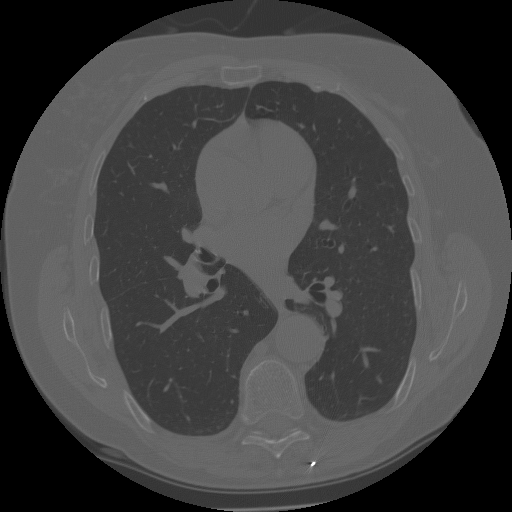


Compressed Image:


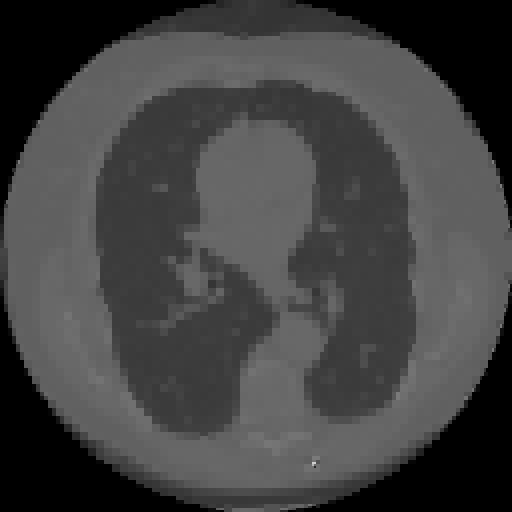

In [4]:
from google.colab.patches import cv2_imshow

# Read the uploaded image
input_image = cv2.imread(image_filename)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Compress the image using CWDR
compressed_image = cwdr_compress(input_image)

# Convert compressed image back to BGR for displaying with OpenCV
compressed_image_bgr = cv2.cvtColor(compressed_image, cv2.COLOR_RGB2BGR)

# Display original and compressed images
print("Original Image:")
cv2_imshow(cv2.imread(image_filename))

print("\nCompressed Image:")
cv2_imshow(compressed_image_bgr)
